<img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png">

<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

## Time-of-Day Research

Now that we have historical data, let's run some preliminary research to validate the thesis that the euro depreciates against the dollar during Europe business hours and appreciates during US business hours.

First, load the prices:

In [1]:
from quantrocket.history import get_historical_prices
prices = get_historical_prices("fiber-1h", fields="Close")

Calculate the hourly returns. (Note that the timezone for forex is always New York time regardless of the currency pair.)

In [2]:
returns = prices.loc["Close"].pct_change()
returns.head()

ConId                12087792
Date       Time              
2005-03-10 00:00:00       NaN
           01:00:00  0.000149
           02:00:00  0.001192
           03:00:00 -0.000595
           04:00:00 -0.000521

Group by time and get the mean return of each group:

In [3]:
times = returns.index.get_level_values("Time")
returns_by_time_of_day = returns.groupby(times).mean()

Finally, plot the results:

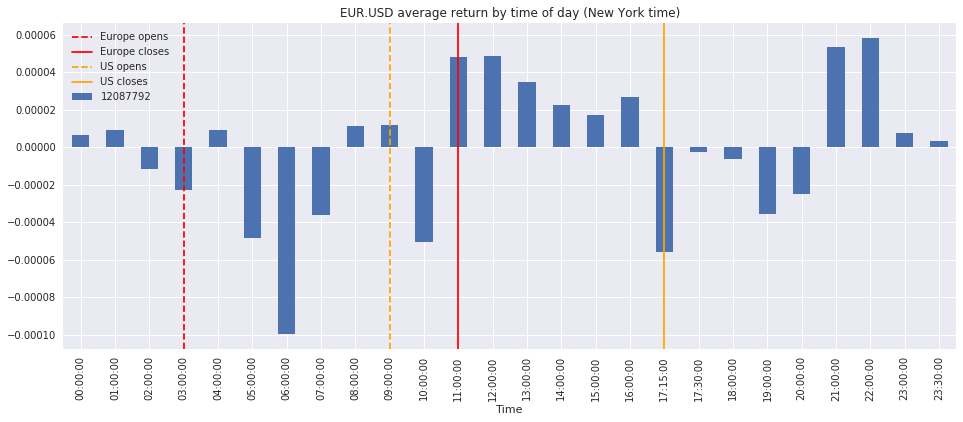

In [4]:
returns_by_time_of_day.plot(kind="bar", title="EUR.USD average return by time of day (New York time)")

# add business day indicators to plot (9 AM - 5 PM Europe time = 3 AM - 11 AM New York Time)
import matplotlib.pyplot as plt
plt.axvline(x=3, label='Europe opens', c="red", linestyle="--")
plt.axvline(x=11, label='Europe closes', c="red", linestyle="-")
plt.axvline(x=9, label='US opens', c="orange", linestyle="--")
plt.axvline(x=17, label='US closes', c="orange", linestyle="-")
plt.legend()

We see clear evidence that EUR.USD declines during Europe's business day (3 AM to 11 AM New York time) then rises through the remainder of the US business day.

***

## *Next Up*

Part 3: [Interactive Strategy Development](Part3-Interactive-Strategy-Development.ipynb)